In [88]:
# reference: https://github.com/nickbiso/Keras-Class-Activation-Map
# convert the frames to video clip using the below ffmpeg command
# ffmpeg -framerate 5 -i video33/video33-%d.jpg video33-1min-clip.mp4

from keras.applications.vgg16 import VGG16
import matplotlib.image as mpimg
from keras import backend as K
from keras.models import load_model
import matplotlib.pyplot as plt
import json
from keras.preprocessing import image
import numpy as np
from keras.applications.vgg16 import preprocess_input
import pandas as pd
from keras.applications.vgg16 import decode_predictions
import cv2
from CNN_LSTM_split_data import generate_feature_train_list, generate_feature_test_list, generate_feature_eval_list
from PIL import ImageDraw 
from PIL import Image
import os
%matplotlib inline
K.clear_session()

In [89]:
config = json.load(open('config/config.json'))
model_path = '../results/VGGLSTM/cnn_model.h5' #args.model /model/models/cnn_model.h5
base_dir = config['base_dir']
target_dir = "cam/"
history_dir = config["history_dir"]
base_image_dir = base_dir + "images/"
base_label_dir = base_dir + "labels/"

eval_image_dir = base_image_dir + "test/"
eval_label_dir = base_label_dir + "test/"

# Dimensions of input feature 
frames = 25 # args.frames    #Number of frames over which LSTM prediction happens
channels = 3  #RGB
rows = 224    
columns = 224 
BATCH_SIZE = 8 #args.batch_size

In [90]:
model = VGG16(weights='imagenet')
#model = load_model(model_path)
#model.load_weights(model_path, by_name=True)

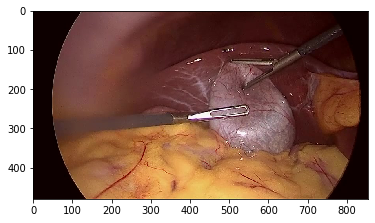

In [91]:
img_path = 'data/images/eval/video77/video77-100.jpg'
img=mpimg.imread(img_path)
plt.imshow(img)

In [92]:
np.shape(img)

(480, 854, 3)

In [93]:

img = image.load_img(img_path, target_size=(224, 224))
print(img.width)

224


In [94]:
def get_cam(model, img):
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    print(x.shape)
    x = preprocess_input(x)
    preds = model.predict(x)
    predictions = pd.DataFrame(decode_predictions(preds, top=3)[0],columns=['col1','category','probability']).iloc[:,1:]
    argmax = np.argmax(preds[0])
    output = model.output[:, argmax]
    last_conv_layer = model.get_layer('block5_conv3')
    grads = K.gradients(output, last_conv_layer.output)[0]
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
    pooled_grads_value, conv_layer_output_value = iterate([x])
    for i in range(512):
        conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
    heatmap = np.mean(conv_layer_output_value, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)  
    heatmap = cv2.resize(heatmap, (img.height, img.width))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    hif = .8
    superimposed_img = heatmap * hif + img
    #plt.imshow(superimposed_img)
    return superimposed_img

def stitch_images(images):
    widths, heights = zip(*(i.size for i in images))
    total_width = sum(widths)
    max_height = max(heights)
    new_im = Image.new('RGB', (total_width, max_height))
    
    x_offset = 0
    for im in images:
      new_im.paste(im, (x_offset,0))
      x_offset += im.size[0]
    return new_im

def create_path(path):
    directory = os.path.dirname(os.path.abspath(path))
    if not os.path.exists(directory):
        os.makedirs(directory)

(1, 224, 224, 3)
cam/data/images/test/video33/video33-1.jpg
(1, 224, 224, 3)
cam/data/images/test/video33/video33-2.jpg
(1, 224, 224, 3)
cam/data/images/test/video33/video33-3.jpg
(1, 224, 224, 3)
cam/data/images/test/video33/video33-4.jpg
(1, 224, 224, 3)
cam/data/images/test/video33/video33-5.jpg
(1, 224, 224, 3)
cam/data/images/test/video33/video33-6.jpg
(1, 224, 224, 3)
cam/data/images/test/video33/video33-7.jpg
(1, 224, 224, 3)
cam/data/images/test/video33/video33-8.jpg
(1, 224, 224, 3)
cam/data/images/test/video33/video33-9.jpg
(1, 224, 224, 3)
cam/data/images/test/video33/video33-10.jpg
(1, 224, 224, 3)
cam/data/images/test/video33/video33-11.jpg
(1, 224, 224, 3)
cam/data/images/test/video33/video33-12.jpg
(1, 224, 224, 3)
cam/data/images/test/video33/video33-13.jpg
(1, 224, 224, 3)
cam/data/images/test/video33/video33-14.jpg
(1, 224, 224, 3)
cam/data/images/test/video33/video33-15.jpg
(1, 224, 224, 3)
cam/data/images/test/video33/video33-16.jpg
(1, 224, 224, 3)
cam/data/images/

cam/data/images/test/video33/video33-135.jpg
(1, 224, 224, 3)
cam/data/images/test/video33/video33-136.jpg
(1, 224, 224, 3)
cam/data/images/test/video33/video33-137.jpg
(1, 224, 224, 3)
cam/data/images/test/video33/video33-138.jpg
(1, 224, 224, 3)
cam/data/images/test/video33/video33-139.jpg
(1, 224, 224, 3)
cam/data/images/test/video33/video33-140.jpg
(1, 224, 224, 3)
cam/data/images/test/video33/video33-141.jpg
(1, 224, 224, 3)
cam/data/images/test/video33/video33-142.jpg
(1, 224, 224, 3)
cam/data/images/test/video33/video33-143.jpg
(1, 224, 224, 3)
cam/data/images/test/video33/video33-144.jpg
(1, 224, 224, 3)
cam/data/images/test/video33/video33-145.jpg
(1, 224, 224, 3)
cam/data/images/test/video33/video33-146.jpg
(1, 224, 224, 3)
cam/data/images/test/video33/video33-147.jpg
(1, 224, 224, 3)
cam/data/images/test/video33/video33-148.jpg
(1, 224, 224, 3)
cam/data/images/test/video33/video33-149.jpg
(1, 224, 224, 3)
cam/data/images/test/video33/video33-150.jpg
(1, 224, 224, 3)
cam/data

cam/data/images/test/video33/video33-268.jpg
(1, 224, 224, 3)
cam/data/images/test/video33/video33-269.jpg
(1, 224, 224, 3)
cam/data/images/test/video33/video33-270.jpg
(1, 224, 224, 3)
cam/data/images/test/video33/video33-271.jpg
(1, 224, 224, 3)
cam/data/images/test/video33/video33-272.jpg
(1, 224, 224, 3)
cam/data/images/test/video33/video33-273.jpg
(1, 224, 224, 3)
cam/data/images/test/video33/video33-274.jpg
(1, 224, 224, 3)
cam/data/images/test/video33/video33-275.jpg
(1, 224, 224, 3)
cam/data/images/test/video33/video33-276.jpg
(1, 224, 224, 3)
cam/data/images/test/video33/video33-277.jpg
(1, 224, 224, 3)
cam/data/images/test/video33/video33-278.jpg
(1, 224, 224, 3)
cam/data/images/test/video33/video33-279.jpg
(1, 224, 224, 3)
cam/data/images/test/video33/video33-280.jpg
(1, 224, 224, 3)
cam/data/images/test/video33/video33-281.jpg
(1, 224, 224, 3)
cam/data/images/test/video33/video33-282.jpg
(1, 224, 224, 3)
cam/data/images/test/video33/video33-283.jpg
(1, 224, 224, 3)
cam/data

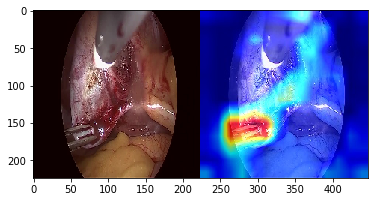

In [102]:
# Get CAM for all frames
validation_samples = generate_feature_eval_list(eval_image_dir, eval_label_dir)
validation_len = int(len(validation_samples)/(BATCH_SIZE*frames))
validation_len = (validation_len-2)*BATCH_SIZE*frames
validation_samples = validation_samples[0:validation_len]
frame_num = 1


tmp_img = 'cam/tmp_img.jpg'
for i in range(len(validation_samples[:300])):
    src_image_path = eval_image_dir + validation_samples[i][0]
    src_label = validation_samples[i][1].split()[1]
    #Original Frame
    pil_img = image.load_img(src_image_path, target_size=(224, 224, 3))
    
    #CAM Image
    cam_img = get_cam(model, pil_img)
    cv2.imwrite(tmp_img, cam_img)
    pil_imgcam = image.load_img(tmp_img, target_size=(224, 224, 3))
    images = [pil_img, pil_imgcam]
    stitched = stitch_images(images)
    src_image_path =  "{0}-{1}.jpg".format(src_image_path.split('-')[0], str(frame_num))
    target_path = target_dir + src_image_path
    create_path(target_path)
    print(target_path)
    stitched.save(target_path, "JPEG")
    plt.imshow(stitched)
    frame_num+=1

    